In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Task 1: Detecting Road Signs 

## Import Training Datasets 

In [2]:
import numpy as np
from PIL import Image
import os

def load_images_from_directory(directory_path):
    images = []
    # Get all files that match the pattern '00000_00000_' and end with '.png'
    image_files = sorted([f for f in os.listdir(directory_path) 
                         if f.endswith('.jpg')])  # Specific to your file pattern
    
    print(f"Found {len(image_files)} image files")
    
    for file_name in image_files:
        try:
            file_path = os.path.join(directory_path, file_name)
            print(f"Loading: {file_path}")  # Debug print
            
            img = Image.open(file_path)
            img_array = np.array(img)
            images.append(img_array)
            
        except Exception as e:
            print(f"Error loading {file_name}: {str(e)}")
    
    return np.array(images)

# Replace with your actual directory path
directory_path = '/Users/kaylahoffman/Downloads/images'
print(f"Loading images from: {directory_path}")

# Load images
X_train = load_images_from_directory(directory_path)
print(f"Final array shape: {X_train.shape}")



Loading images from: /Users/kaylahoffman/Downloads/images
Found 200 image files
Loading: /Users/kaylahoffman/Downloads/images/rome_41.554366_12.546681_259.jpg
Loading: /Users/kaylahoffman/Downloads/images/rome_41.56088_12.549556_566.jpg
Loading: /Users/kaylahoffman/Downloads/images/rome_41.568546_12.559981_980.jpg
Loading: /Users/kaylahoffman/Downloads/images/rome_41.58061_12.523956_623.jpg
Loading: /Users/kaylahoffman/Downloads/images/rome_41.594376_12.65403_971.jpg
Loading: /Users/kaylahoffman/Downloads/images/rome_41.596013_12.545178_576.jpg
Loading: /Users/kaylahoffman/Downloads/images/rome_41.599138_12.653629_799.jpg
Loading: /Users/kaylahoffman/Downloads/images/rome_41.603538_12.630994_235.jpg
Loading: /Users/kaylahoffman/Downloads/images/rome_41.604718_12.634222_460.jpg
Loading: /Users/kaylahoffman/Downloads/images/rome_41.606037_12.562249_443.jpg
Loading: /Users/kaylahoffman/Downloads/images/rome_41.620829_12.535479_463.jpg
Loading: /Users/kaylahoffman/Downloads/images/rome_41.

In [3]:
def load_text_files(directory_path):
    labels = []
    # Get all text files and sort them to maintain order
    text_files = sorted([f for f in os.listdir(directory_path) 
                        if f.endswith('.txt')])
    
    print(f"Found {len(text_files)} text files")
    
    for file_name in text_files:
        try:
            file_path = os.path.join(directory_path, file_name)
            with open(file_path, 'r') as f:
                content = f.read().strip()  # Remove any whitespace
                labels.append(content)
            print(f"Loaded: {file_name}")
            
        except Exception as e:
            print(f"Error loading {file_name}: {str(e)}")
    
    return np.array(labels)

# Replace with your actual directory path containing the text files
directory_path = '/Users/kaylahoffman/Downloads/labels'
print(f"Loading labels from: {directory_path}")

# Load labels
y_train = load_text_files(directory_path)
print(f"Number of labels loaded: {len(y_train)}")

# Print first few labels to verify
print("\nFirst few labels:")
print(y_train[:5])

Loading labels from: /Users/kaylahoffman/Downloads/labels
Found 3530 text files
Loaded: 000000_jpg.rf.b11f308f16626f9f795a148029c46d10.txt
Loaded: 000005_jpg.rf.d730849ae93a7c211a7c8f57ed851028.txt
Loaded: 000007_jpg.rf.226fe0751cf8ba445b8f87970e70f606.txt
Loaded: 000008_jpg.rf.bd6ae6db0f8c0eb727706bc322ce21ae.txt
Loaded: 000009_jpg.rf.df4118d1d26fa7a25923521216cc2f64.txt
Loaded: 00000_00000_00000_png.rf.55d47572c5980af0892b0c2ada6dae77.txt
Loaded: 00000_00000_00000_png.rf.eb9b5799307ebcf07dd4c95eac0e6d13.txt
Loaded: 00000_00000_00001_png.rf.56c1f101f790944f14f215c7cad2a2b8.txt
Loaded: 00000_00000_00001_png.rf.8bc8cc5e727cfd7e81b5184a15dd6fc1.txt
Loaded: 00000_00000_00002_png.rf.c8ad86390583e313b909403180f01ffd.txt
Loaded: 00000_00000_00004_png.rf.8737f80bd4f1455970179b3df433fba5.txt
Loaded: 00000_00000_00004_png.rf.aca6f66c5ac9e8f41d9ed188ecff427d.txt
Loaded: 00000_00000_00005_png.rf.998f471ba534c1f2ccafdafcd63c12a4.txt
Loaded: 00000_00000_00006_png.rf.80574bc0c6d4cc6f5e2f151110a5e7a1

## Import Validation Datasets

In [4]:
import numpy as np
from PIL import Image
import os

def load_images_from_directory(directory_path):
    images = []
    # Get all files that match the pattern '00000_00000_' and end with '.png'
    image_files = sorted([f for f in os.listdir(directory_path) 
                         if f.endswith('.jpg')])  # Specific to your file pattern
    
    print(f"Found {len(image_files)} image files")
    
    for file_name in image_files:
        try:
            file_path = os.path.join(directory_path, file_name)
            print(f"Loading: {file_path}")  # Debug print
            
            img = Image.open(file_path)
            img_array = np.array(img)
            images.append(img_array)
            
        except Exception as e:
            print(f"Error loading {file_name}: {str(e)}")
    
    return np.array(images)

# Replace with your actual directory path
directory_path = '/Users/kaylahoffman/Downloads/images_val'
print(f"Loading images from: {directory_path}")

# Load images
X_test = load_images_from_directory(directory_path)
print(f"Final array shape: {X_test.shape}")


Loading images from: /Users/kaylahoffman/Downloads/images_val
Found 801 image files
Loading: /Users/kaylahoffman/Downloads/images_val/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg
Loading: /Users/kaylahoffman/Downloads/images_val/000002_jpg.rf.d65ebeef4d1cb26e3fc1a826770b729f.jpg
Loading: /Users/kaylahoffman/Downloads/images_val/000004_jpg.rf.00126fe7725236ec5dc849bac78543c2.jpg
Loading: /Users/kaylahoffman/Downloads/images_val/00000_00000_00002_png.rf.109f031ac8e60eba952da43b054389c0.jpg
Loading: /Users/kaylahoffman/Downloads/images_val/00000_00000_00003_png.rf.e1d0c6904cad2c27548ec3c332b2e088.jpg
Loading: /Users/kaylahoffman/Downloads/images_val/00000_00000_00008_png.rf.823f2aa00055169915d8979d389796eb.jpg
Loading: /Users/kaylahoffman/Downloads/images_val/00000_00000_00010_png.rf.ea7f6dcad45043cc1275a3722f259c45.jpg
Loading: /Users/kaylahoffman/Downloads/images_val/00000_00000_00011_png.rf.d273eb7959d82848c1bbf816e503a7cc.jpg
Loading: /Users/kaylahoffman/Downloads/images_val/000

In [5]:
def load_text_files(directory_path):
    labels = []
    # Get all text files and sort them to maintain order
    text_files = sorted([f for f in os.listdir(directory_path) 
                        if f.endswith('.txt')])
    
    print(f"Found {len(text_files)} text files")
    
    for file_name in text_files:
        try:
            file_path = os.path.join(directory_path, file_name)
            with open(file_path, 'r') as f:
                content = f.read().strip()  # Remove any whitespace
                labels.append(content)
            print(f"Loaded: {file_name}")
            
        except Exception as e:
            print(f"Error loading {file_name}: {str(e)}")
    
    return np.array(labels)

# Replace with your actual directory path containing the text files
directory_path = '/Users/kaylahoffman/Downloads/labels_val'
print(f"Loading labels from: {directory_path}")

# Load labels
y_test = load_text_files(directory_path)
print(f"Number of labels loaded: {len(y_test)}")

# Print first few labels to verify
print("\nFirst few labels:")
print(y_test[:5])

Loading labels from: /Users/kaylahoffman/Downloads/labels_val
Found 801 text files
Loaded: 000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.txt
Loaded: 000002_jpg.rf.d65ebeef4d1cb26e3fc1a826770b729f.txt
Loaded: 000004_jpg.rf.00126fe7725236ec5dc849bac78543c2.txt
Loaded: 00000_00000_00002_png.rf.109f031ac8e60eba952da43b054389c0.txt
Loaded: 00000_00000_00003_png.rf.e1d0c6904cad2c27548ec3c332b2e088.txt
Loaded: 00000_00000_00008_png.rf.823f2aa00055169915d8979d389796eb.txt
Loaded: 00000_00000_00010_png.rf.ea7f6dcad45043cc1275a3722f259c45.txt
Loaded: 00000_00000_00011_png.rf.d273eb7959d82848c1bbf816e503a7cc.txt
Loaded: 00000_00000_00016_png.rf.501890d4ac7f8422f349833245d7abc0.txt
Loaded: 00000_00000_00017_png.rf.af8c4a23f87c883e6c718be719d78834.txt
Loaded: 00000_00000_00019_png.rf.5e0626fb5f6c03e2137b454192d1a6ea.txt
Loaded: 00000_00000_00023_png.rf.ba3c9472391c55dddbea2b609d7c95ef.txt
Loaded: 00000_00000_00024_png.rf.b7b5b6753ff94db8b6ad0904043f5c47.txt
Loaded: 00000_00000_00028_png.rf.79164ee

## Train Test Split 

In [6]:
X_train, X_val = train_test_split(X_train, random_state=42)
y_train, y_val = train_test_split(y_train, random_state=42)

X_test, X_val = train_test_split(X_test, random_state=42)
y_test, y_val = train_test_split(y_test, random_state=42)

In [7]:
y_train = y_train[:X_train.shape[0]]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (150, 640, 640, 3)
y_train shape: (150,)


In [8]:
y_test = y_test[:X_test.shape[0]]

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (600, 416, 416, 3)
y_test shape: (600,)


In [9]:
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)

X_train dtype: uint8
y_train dtype: <U550


## Data Preprocessing Step

In [10]:
X_train = X_train.astype('float32') / 255.0

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Convert X_train to float32 and normalize
X_train = X_train.astype('float32') / 255.0

# Convert y_train to numeric labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Verify the new data types
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)

X_train dtype: float32
y_train dtype: int64


In [11]:
num_classes = len(np.unique(y_train))
print("Number of unique classes:", num_classes)

Number of unique classes: 150


In [12]:
print("Sample y_train values:")
print(y_train[:5])
print("\nSample y_test values:")
print(y_test[:5])

Sample y_train values:
[148 126  24  42  17]

Sample y_test values:
['10 0.4639423076923077 0.5252403846153846 0.765625 0.7668269230769231'
 '7 0.5444711538461539 0.5276442307692307 0.5673076923076923 0.6790865384615384'
 '0 0.33413461538461536 0.24639423076923078 0.013221153846153846 0.0625\n0 0.5721153846153846 0.22235576923076922 0.01201923076923077 0.05889423076923077'
 '10 0.5060096153846154 0.5060096153846154 0.6754807692307693 0.6670673076923077'
 '6 0.5216346153846154 0.5024038461538461 0.7091346153846154 0.7043269230769231']


In [13]:
# Assuming y_train is a numpy array
num_classes = y_train.shape
print("Number of classes:", num_classes)

print("num_classes type:", type(num_classes))
print("num_classes value:", num_classes)

Number of classes: (150,)
num_classes type: <class 'tuple'>
num_classes value: (150,)


In [14]:
num_classes = num_classes[0] if isinstance(num_classes, tuple) else num_classes

y_test_labels = np.array([int(label.split()[0]) for label in y_test])
print("y_test_labels type:", type(y_test_labels))
print("y_test_labels shape:", y_test_labels.shape)
print("y_test_labels:", y_test_labels)

y_test_labels type: <class 'numpy.ndarray'>
y_test_labels shape: (600,)
y_test_labels: [10  7  0 10  6  7  8 14 11  7 10  7 10 10  6 12 11 12  0 12 10  3  5 10
 13  6 12 11  7  3  5 10  5 12 11 12 14 10 14  8  0 12  7  6 13  9 14  7
  7  9  6 11 11  0 14  6 13 14 14  6 14 12  8  1 14  5  6  1 12  7  7 13
  5 11 11  5  0 11 10 13  7 14 11  1  7  0 14 10 12  0  8  7 14  8  9  9
  5  9 10  7  0 12  8  5  0  0  6 11  6  6 10  8 10 10 11  1 13 11  4 12
  7  5  3  6  6 14  7  5 11 14 13 10  5 13  9 12  6 12  6 11  3  9 14  0
 14  1 11 12  9  1 14  3  7 11  0  9 10  7 12  8  3  7  0 11  3 12  7  0
  9  9  3  5 12  7 10  1 11  7  3  6  9 11  4 10 11  3  7  3 10  5  8 13
  1 14  3  4  5  5 12  6 14 14 13  3 11 14  4  9  7 14 11  9  1 11  1  8
 11  5  7  0  8 10  9  7  8 11  3  6 12 12  1  9 14  8 10 14 10  8  3  7
  6 10  0  5  9 12  6  8  8  5 14  6  9 10  6  7 12  5  5 10  3  3  1 10
 10 12  5 14  7  5  9  0 10 14  1  7  3 11  3  6 10  9  7  3 13  1 13  8
 11  9  0  8  0  9 11  5 14  1  9  9 

In [15]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (150,)
y_test shape: (600,)


## Check consistent shapes 

### The data structure is consistent because 
    - The number of samples in X_train_resized matches the number of labels in y_train (150)
    - The number of samples in X_test_resized matches the number of labels in y_test (600)

In [16]:
from tensorflow.keras.preprocessing.image import img_to_array, smart_resize

def resize_images(images, target_size=(640, 640)):
    resized_images = []
    for img in images:
        resized_img = smart_resize(img, target_size)
        resized_images.append(img_to_array(resized_img))
    return np.array(resized_images)

X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

print("Resized X_train shape:", X_train_resized.shape)
print("Resized X_test shape:", X_test_resized.shape)

X_train_resized = X_train_resized.astype('float32') / 255.0
X_test_resized = X_test_resized.astype('float32') / 255.0

2024-11-21 17:12:38.646740: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Resized X_train shape: (150, 640, 640, 3)
Resized X_test shape: (600, 640, 640, 3)


In [17]:
print('X_train_resized shape:', X_train_resized.shape)
print('y_train shape:', y_train.shape)
print('X_test_resized shape:', X_test_resized.shape)
print('y_test shape:', y_test.shape)

X_train_resized shape: (150, 640, 640, 3)
y_train shape: (150,)
X_test_resized shape: (600, 640, 640, 3)
y_test shape: (600,)


## Now use one hot encoder 

In [19]:
# Extract the first number from each string in y_test
y_test_labels = np.array([int(label.split()[0]) for label in y_test])

print("y_test_labels shape:", y_test_labels.shape)
print("Unique values in y_test_labels:", np.unique(y_test_labels))

# Now one-hot encode
from tensorflow.keras.utils import to_categorical

num_classes = 750  # This should match the number of columns in y_train
y_test_encoded = to_categorical(y_test_labels, num_classes=num_classes)

print("y_test_encoded shape:", y_test_encoded.shape)

y_test_labels shape: (600,)
Unique values in y_test_labels: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14]
y_test_encoded shape: (600, 750)


## Create and Train the first Model

In [21]:
from tensorflow.keras import layers, models

input_shape = (640, 640, 3)  # This matches your resized images
num_classes = y_train.shape  # This should be 300 based on your reshaped y_train

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(750, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 638, 638, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 319, 319, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 317, 317, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 158, 158, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 156, 156, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 78, 78, 64)       0

In [24]:
print("X_train shape:", X_train_resized.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test_resized.shape)
print("y_test shape:", y_test.shape)

X_train shape: (150, 640, 640, 3)
y_train shape: (150, 750)
X_test shape: (600, 640, 640, 3)
y_test shape: (600,)


In [25]:
ttgg# Make predictions
y_pred_probabilities = model.predict(X_test_resized)fdd

Epoch 1/10
10/10 [==============================] - 70s 7s/step - loss: 6.6312 - accuracy: 0.0000e+00 - val_loss: 6.2172 - val_accuracy: 0.0583
Epoch 2/10
10/10 [==============================] - 67s 7s/step - loss: 6.1604 - accuracy: 0.0133 - val_loss: 7.4620 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 63s 7s/step - loss: 5.4977 - accuracy: 0.0000e+00 - val_loss: 5.2997 - val_accuracy: 0.1067
Epoch 4/10
10/10 [==============================] - 63s 7s/step - loss: 5.2692 - accuracy: 0.0067 - val_loss: 5.1396 - val_accuracy: 0.1067
Epoch 5/10
10/10 [==============================] - 64s 7s/step - loss: 5.1555 - accuracy: 0.0067 - val_loss: 5.1421 - val_accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 66s 7s/step - loss: 5.1250 - accuracy: 0.0000e+00 - val_loss: 5.2154 - val_accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 64s 7s/step - loss: 5.1146 - accuracy: 0.0000e+00 - val_loss: 4.9567 - val_accuracy:

In [26]:
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

Final Validation Accuracy: 0.0000


In [27]:
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")

Final Training Accuracy: 0.0000


In [88]:
avg_train_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])
avg_val_accuracy = sum(history.history['val_accuracy']) / len(history.history['val_accuracy'])

print(f"Average Training Accuracy: {avg_train_accuracy:.4f}")
print(f"Average Validation Accuracy: {avg_val_accuracy:.4f}")

Average Training Accuracy: 0.0073
Average Validation Accuracy: 0.0002


## Plot and print the Evaluation Report for Model 1

Model Evaluation Report

Training Accuracy:
Epoch 1: 0.0000
Epoch 2: 0.0133
Epoch 3: 0.0000
Epoch 4: 0.0067
Epoch 5: 0.0067
Epoch 6: 0.0000
Epoch 7: 0.0000
Epoch 8: 0.0000
Epoch 9: 0.0067
Epoch 10: 0.0000

Validation Accuracy:
Epoch 1: 0.0583
Epoch 2: 0.0000
Epoch 3: 0.1067
Epoch 4: 0.1067
Epoch 5: 0.0000
Epoch 6: 0.0000
Epoch 7: 0.0000
Epoch 8: 0.0000
Epoch 9: 0.0000
Epoch 10: 0.0000

Training Loss:
Epoch 1: 6.6312
Epoch 2: 6.1604
Epoch 3: 5.4977
Epoch 4: 5.2692
Epoch 5: 5.1555
Epoch 6: 5.1250
Epoch 7: 5.1146
Epoch 8: 5.1075
Epoch 9: 5.0984
Epoch 10: 5.0901

Validation Loss:
Epoch 1: 6.2172
Epoch 2: 7.4620
Epoch 3: 5.2997
Epoch 4: 5.1396
Epoch 5: 5.1421
Epoch 6: 5.2154
Epoch 7: 4.9567
Epoch 8: 5.0488
Epoch 9: 5.0202
Epoch 10: 5.0515

Final Results:
Final Training Accuracy: 0.0000
Final Validation Accuracy: 0.0000
Final Training Loss: 5.0901
Final Validation Loss: 5.0515


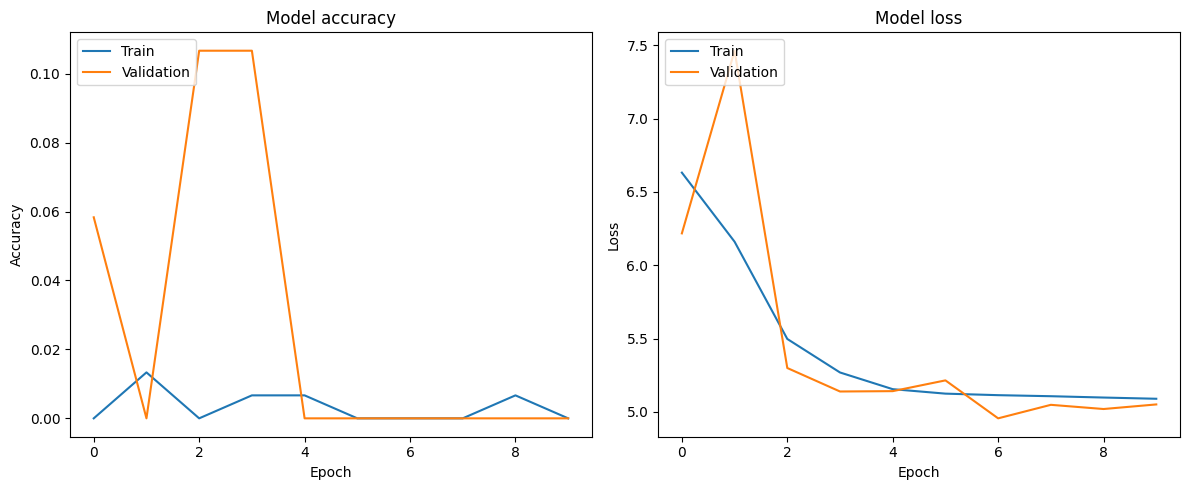

In [28]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.show()

def print_evaluation_report(history):
    print("Model Evaluation Report")
    print("=======================")
    
    print("\nTraining Accuracy:")
    for i, acc in enumerate(history.history['accuracy']):
        print(f"Epoch {i+1}: {acc:.4f}")
    
    print("\nValidation Accuracy:")
    for i, acc in enumerate(history.history['val_accuracy']):
        print(f"Epoch {i+1}: {acc:.4f}")
    
    print("\nTraining Loss:")
    for i, loss in enumerate(history.history['loss']):
        print(f"Epoch {i+1}: {loss:.4f}")
    
    print("\nValidation Loss:")
    for i, loss in enumerate(history.history['val_loss']):
        print(f"Epoch {i+1}: {loss:.4f}")
    
    print("\nFinal Results:")
    print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
    print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

# Assuming you have already trained your model and have the history object
# history = model.fit(...)

# Print the evaluation report
print_evaluation_report(history)

# Plot the training history
plot_training_history(history)

## Confusion Matrix 

In [77]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Define input shape and number of classes
input_shape = (224, 224, 3)  # Reduced input size
num_classes = 750  # Assuming this is the correct number of classes

# Data Augmentation
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2),
])

# Load pre-trained ResNet50V2 model
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False  # Freeze the base model

# Build the model
model = models.Sequential([
    layers.Input(shape=input_shape),
    data_augmentation,
    layers.Rescaling(1./255),  # Normalize pixel values
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_30  (None, 2048)             0         
 3 (GlobalAveragePooling2D)                                      
                                                                 
 batch_normalization_699 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dropout_17 (Dropout)        (None, 2048)             

In [80]:
print("X_train shape:", X_train_resized.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test_resized.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

X_train shape: (150, 224, 224, 3)
y_train shape: (150, 750)
X_test shape: (600, 224, 224, 3)
y_test_encoded shape: (600, 750)


In [82]:
# Train the model
history = model.fit(
    X_train_resized, y_train,
    epochs=10,  # Increased epochs, early stopping will prevent overfitting
    batch_size=16,
    validation_data=(X_test_resized, y_test_encoded),
    verbose=1
)



Epoch 1/10
10/10 [==============================] - 42s 4s/step - loss: 19.8828 - accuracy: 0.0000e+00 - val_loss: 19.2742 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 34s 4s/step - loss: 19.0086 - accuracy: 0.0067 - val_loss: 18.4421 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 32s 4s/step - loss: 18.1928 - accuracy: 0.0000e+00 - val_loss: 17.6628 - val_accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 33s 4s/step - loss: 17.4265 - accuracy: 0.0067 - val_loss: 16.9352 - val_accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 31s 3s/step - loss: 16.7104 - accuracy: 0.0067 - val_loss: 16.2553 - val_accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 32s 3s/step - loss: 16.0395 - accuracy: 0.0067 - val_loss: 15.6185 - val_accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 31s 3s/step - loss: 15.4204 - accuracy: 0.0000e+00 - val_loss: 1

In [83]:
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

Final Validation Accuracy: 0.0000


In [84]:
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")

Final Training Accuracy: 0.0067


In [87]:
avg_train_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])
avg_val_accuracy = sum(history.history['val_accuracy']) / len(history.history['val_accuracy'])

print(f"Average Training Accuracy: {avg_train_accuracy:.4f}")
print(f"Average Validation Accuracy: {avg_val_accuracy:.4f}")

Average Training Accuracy: 0.0073
Average Validation Accuracy: 0.0002


In [85]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights (assuming y_train_original contains integer labels)
y_train_original = np.argmax(y_train, axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_original), y=y_train_original)
class_weight_dict = dict(enumerate(class_weights))

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train_resized, y_train,
    epochs=10,  # Increased epochs, early stopping will prevent overfitting
    batch_size=16,
    validation_data=(X_test_resized, y_test_encoded),
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr],
    shuffle=True,
    verbose=1
)

Epoch 1/10
10/10 [==============================] - 34s 3s/step - loss: 13.3012 - accuracy: 0.0133 - val_loss: 13.0018 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/10
10/10 [==============================] - 32s 3s/step - loss: 12.8481 - accuracy: 0.0133 - val_loss: 12.5710 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/10
10/10 [==============================] - 32s 4s/step - loss: 12.4249 - accuracy: 0.0067 - val_loss: 12.1670 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 4/10
10/10 [==============================] - 32s 3s/step - loss: 12.0257 - accuracy: 0.0133 - val_loss: 11.7869 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 5/10
10/10 [==============================] - 32s 4s/step - loss: 11.6541 - accuracy: 0.0067 - val_loss: 11.4313 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 6/10
10/10 [==============================] - 33s 4s/step - loss: 11.3052 - accuracy: 0.0067 - val_loss: 11.0974 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 7/10
10/10 [====

In [86]:
avg_train_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])
avg_val_accuracy = sum(history.history['val_accuracy']) / len(history.history['val_accuracy'])

print(f"Average Training Accuracy: {avg_train_accuracy:.4f}")
print(f"Average Validation Accuracy: {avg_val_accuracy:.4f}")

Average Training Accuracy: 0.0073
Average Validation Accuracy: 0.0002
